<a href="https://colab.research.google.com/github/bagher2901/colab_deep_learn/blob/main/callback_hyperOpt_reg_keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## regression

In [ ]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
cal_house = fetch_california_housing()

In [ ]:
x_train0,x_test,y_train0,y_test =  train_test_split(cal_house['data'],cal_house['target'])

In [ ]:
x_train1,x_validation,y_train1,y_validation =  train_test_split(x_train0,y_train0)

In [ ]:
x_test.shape

(5160, 8)

In [ ]:
x_train0.shape

(15480, 8)

In [ ]:
x_train1.shape

(11610, 8)

In [ ]:
x_validation.shape

(3870, 8)

In [ ]:
sc = StandardScaler()
norm_x_train = sc.fit_transform(x_train1)
norm_x_validation = sc.transform(x_validation)
norm_x_test = sc.transform(x_test)

In [ ]:
norm_x_train

array([[ 2.2018317 , -1.00312565,  0.91568562, ..., -0.01760759,
        -0.63622898,  0.51277508],
       [-0.04007293, -1.16232801, -0.149334  , ...,  0.01731243,
        -0.80926863,  0.74264028],
       [-0.58558781, -1.16232801,  0.49849514, ..., -0.03637124,
         2.75908959, -1.40110254],
       ...,
       [-1.19619461,  0.19089198, -0.36558028, ..., -0.05150775,
         1.80503313, -0.99633991],
       [-0.14849018, -0.60511977,  3.78048425, ..., -0.04207374,
        -0.90280357,  1.44722708],
       [-0.48963829, -0.12751272, -0.14327856, ..., -0.01909429,
         0.52828111, -0.13684395]])

In [ ]:
norm_x_test

array([[-0.13217824, -0.92352448, -0.22778005, ...,  0.01795279,
        -1.27226661,  1.22235895],
       [-0.33103844,  0.90730257, -0.53822261, ...,  0.08133157,
        -0.82329887,  0.68767252],
       [ 1.33932492, -1.00312565,  1.16753252, ..., -0.06957443,
        -0.6783197 ,  0.17297436],
       ...,
       [ 0.48289616, -1.40113153,  0.34279907, ..., -0.03115858,
         0.55634159, -0.13684395],
       [-0.60631541, -0.8439233 , -0.16776169, ..., -0.03939379,
        -1.30968059,  1.33729155],
       [-0.61857534, -1.63993506,  0.00549053, ..., -0.04023516,
         1.37009563, -0.571589  ]])

# Sequential API

In [72]:

model = keras.models.Sequential([
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_absolute_error'])

In [ ]:
model.fit(norm_x_train,y_train1,epochs=10,validation_data=(norm_x_validation,y_validation))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.8020 - mean_absolute_error: 0.6198 - val_loss: 0.7040 - val_mean_absolute_error: 0.5422
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5231 - mean_absolute_error: 0.5132 - val_loss: 0.4853 - val_mean_absolute_error: 0.5119
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4597 - mean_absolute_error: 0.4881 - val_loss: 0.4501 - val_mean_absolute_error: 0.4822
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4357 - mean_absolute_error: 0.4728 - val_loss: 0.4271 - val_mean_absolute_error: 0.4652
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4203 - mean_absolute_error: 0.4629 - val_loss: 0.4229 - val_mean_absolute_error: 0.4605
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4096 - mean_absolute_error: 0.4561 - val_loss: 0.4113 - val_mean_absolute_error: 0.4500
Epoch 7/10
363/3

# functional API

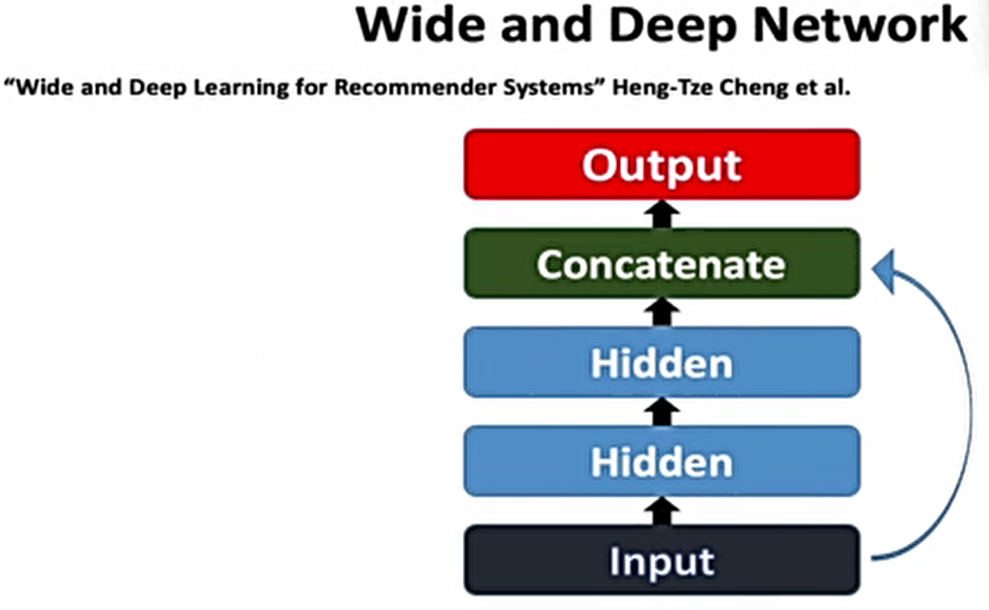

In [ ]:
input_ = keras.layers.Input(shape=x_train1.shape[1:])
hidden_L1 = keras.layers.Dense(50,activation='relu')(input_)
hidden_L2 =  keras.layers.Dense(10,activation='relu')(hidden_L1)
Concatenate_L =  keras.layers.Concatenate()([input_,hidden_L2])
output =  keras.layers.Dense(1)(Concatenate_L)
model = keras.Model(inputs=[input_],outputs=[output])

In [ ]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_absolute_error'])


In [ ]:
model.fit(norm_x_train,y_train1,epochs=10,validation_data=(norm_x_validation,y_validation))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.1973 - mean_absolute_error: 0.6903 - val_loss: 7.5038 - val_mean_absolute_error: 0.6710
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1976 - mean_absolute_error: 0.5648 - val_loss: 1.2948 - val_mean_absolute_error: 0.5459
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 6.6240 - mean_absolute_error: 0.5783 - val_loss: 0.5969 - val_mean_absolute_error: 0.5343
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 1.1353 - mean_absolute_error: 0.5434 - val_loss: 0.5269 - val_mean_absolute_error: 0.5105
Epoch 5/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4699 - mean_absolute_error: 0.4916 - val_loss: 0.4710 - val_mean_absolute_error: 0.4870
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4721 - mean_absolute_error: 0.4802 - val_loss: 0.4626 - val_mean_absolute_error: 0.4687
Epoch 7/10
363/3

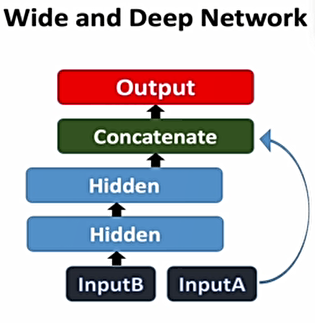

In [ ]:
norm_x_train_1,norm_x_train_2 = norm_x_train[: , :6],norm_x_train[: , -4:]
norm_x_validation_1,norm_x_validation_2 = norm_x_validation[: , :6],norm_x_validation[: , -4:]
norm_x_test_1,norm_x_test_2 = norm_x_test[: , :6],norm_x_test[: , -4:]

In [ ]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_L1 = keras.layers.Dense(50,activation='relu')(input_1)
hidden_L2 =  keras.layers.Dense(10,activation='relu')(hidden_L1)
Concatenate_L =  keras.layers.Concatenate()([input_2,hidden_L2])
output =  keras.layers.Dense(1)(Concatenate_L)
model = keras.Model(inputs=[input_1,input_2],outputs=[output]) 

In [ ]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_absolute_error'])


In [ ]:
model.fit((norm_x_train_1,norm_x_train_2),
          y_train1,epochs=10,
          validation_data=((norm_x_validation_1,norm_x_validation_2),y_validation))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.0598 - mean_absolute_error: 0.6496 - val_loss: 1.9528 - val_mean_absolute_error: 0.5339
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7780 - mean_absolute_error: 0.5190 - val_loss: 0.4767 - val_mean_absolute_error: 0.5056
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4682 - mean_absolute_error: 0.4973 - val_loss: 0.4751 - val_mean_absolute_error: 0.4982
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4521 - mean_absolute_error: 0.4882 - val_loss: 0.4477 - val_mean_absolute_error: 0.4886
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4405 - mean_absolute_error: 0.4808 - val_loss: 0.4436 - val_mean_absolute_error: 0.4808
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4322 - mean_absolute_error: 0.4736 - val_loss: 0.4359 - val_mean_absolute_error: 0.4814
Epoch 7/10
363/3

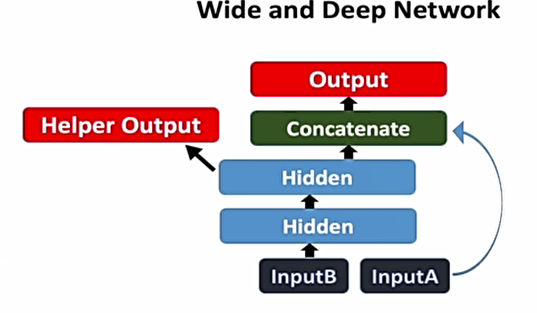

In [ ]:
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])
hidden_L1 = keras.layers.Dense(50,activation='relu')(input_1)
hidden_L2 =  keras.layers.Dense(10,activation='relu')(hidden_L1)
Concatenate_L =  keras.layers.Concatenate()([input_2,hidden_L2])
output =  keras.layers.Dense(1,name='output')(Concatenate_L)
helper_output = keras.layers.Dense(1, name='helper_output')(hidden_L2)
model = keras.Model(inputs=[input_1,input_2],outputs=[output,helper_output]) 

In [ ]:
model.compile(loss=['mse','mse'],
              loss_weights=[0.8,0.2],
              optimizer='sgd',
              metrics=['mean_absolute_error'])
# mse = mean_squared_error
# 0.2 --> loss weight helper out put and 0.8 --> loss weight output

In [ ]:
model.fit((norm_x_train_1,norm_x_train_2),
          [y_train1,y_train1],
          epochs=10,
          validation_data=((norm_x_validation_1,norm_x_validation_2),(y_validation,y_validation)))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.1655 - output_loss: 1.1476 - helper_output_loss: 1.2369 - output_mean_absolute_error: 0.6889 - helper_output_mean_absolute_error: 0.7776 - val_loss: 0.9198 - val_output_loss: 0.9619 - val_helper_output_loss: 0.7512 - val_output_mean_absolute_error: 0.5747 - val_helper_output_mean_absolute_error: 0.6152
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.7475 - output_loss: 1.9888 - helper_output_loss: 0.7822 - output_mean_absolute_error: 0.5719 - helper_output_mean_absolute_error: 0.6207 - val_loss: 0.6255 - val_output_loss: 0.5863 - val_helper_output_loss: 0.7821 - val_output_mean_absolute_error: 0.5320 - val_helper_output_mean_absolute_error: 0.5865
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.9358 - output_loss: 0.9561 - helper_output_loss: 0.8543 - output_mean_absolute_error: 0.5385 - helper_output_mean_absolute_error: 0.5846 - val_loss: 0.4874 - val_ou

# callback API

In [ ]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg.h5",
                                                            monitor='val_loss',
                                                            save_best_only=True)


model_EarlyStopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_TensorBoard = keras.callbacks.TensorBoard('tb_log')

In [ ]:
model.fit((norm_x_train_1,norm_x_train_2),(y_train1,y_train1),
          epochs=500,validation_data=((norm_x_validation_1,norm_x_validation_2),(y_validation,y_validation)),
          callbacks =[model_checkpoint_callback,model_EarlyStopping,model_TensorBoard])

Epoch 1/500
363/363 [==============================] - 1s 4ms/step - loss: 0.3794 - output_loss: 0.3659 - helper_output_loss: 0.4332 - output_mean_absolute_error: 0.4318 - helper_output_mean_absolute_error: 0.4772 - val_loss: 0.4252 - val_output_loss: 0.4222 - val_helper_output_loss: 0.4372 - val_output_mean_absolute_error: 0.4386 - val_helper_output_mean_absolute_error: 0.4773
Epoch 2/500
363/363 [==============================] - 1s 3ms/step - loss: 0.3853 - output_loss: 0.3736 - helper_output_loss: 0.4324 - output_mean_absolute_error: 0.4323 - helper_output_mean_absolute_error: 0.4769 - val_loss: 0.3712 - val_output_loss: 0.3599 - val_helper_output_loss: 0.4164 - val_output_mean_absolute_error: 0.4398 - val_helper_output_mean_absolute_error: 0.4783
Epoch 3/500
363/363 [==============================] - 1s 3ms/step - loss: 0.3778 - output_loss: 0.3645 - helper_output_loss: 0.4311 - output_mean_absolute_error: 0.4306 - helper_output_mean_absolute_error: 0.4755 - val_loss: 0.3899 - val

In [ ]:
model_f_reg = keras.models.load_model('model_cb_reg.h5')

In [ ]:

%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir=tb_log --port 15 

# hyperparameter optimization

In [66]:
from keras import optimizers
def ann_model(number_of_hide_L=1,number_of_neurons=50,learning_r=0.03):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=[8]))
  for hidden_layer in range(number_of_hide_L):
    model.add(keras.layers.Dense(number_of_neurons,activation='selu'))
  model.add(keras.layers.Dense(1))
  sgd = keras.optimizers.SGD(learning_rate=learning_r)
  model.compile(loss='mse',optimizer=sgd)
  return model



In [67]:
from sklearn.model_selection import GridSearchCV

keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)
param_grid = {'number_of_hide_L':[1,2],
              'number_of_neurons':[50,100],
              'learning_r':[0.01,0.03]}
keras_sklearn_reg_gs =  GridSearchCV(keras_sk_reg,param_grid)

<ipython-input-67-e853597b3073>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_sk_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn=ann_model)


In [68]:

keras_sklearn_reg_gs.fit(norm_x_train,y_train1,epochs=10,validation_data=(norm_x_validation,y_validation),callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/10
291/291 [==============================] - 1s 2ms/step - loss: 0.9478 - val_loss: 0.6358
Epoch 2/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5342 - val_loss: 0.5309
Epoch 3/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5016 - val_loss: 0.5315
Epoch 4/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5017 - val_loss: 0.5038
Epoch 5/10
291/291 [==============================] - 1s 2ms/step - loss: 0.5215 - val_loss: 0.5046
Epoch 6/10
291/291 [==============================] - 1s 2ms/step - loss: 0.4802 - val_loss: 0.5280
Epoch 7/10
73/73 [==============================] - 0s 2ms/step - loss: 0.5030
Epoch 1/10
291/291 [==============================] - 2s 4ms/step - loss: 0.7519 - val_loss: 1.4202
Epoch 2/10
291/291 [==============================] - 1s 2ms/step - loss: 7.0072 - val_loss: 3.1997
Epoch 3/10
291/291 [==============================] - 1s 2ms/step - loss: 2.1775 - val_loss: 0.6514
Epoch 4/10
291/291 [=

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-0.507186   -0.4994804  -0.51015553         nan         nan         nan
         nan         nan]
  warnings.warn(


363/363 [==============================] - 2s 3ms/step - loss: 0.6585 - val_loss: 0.9159
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.2006 - val_loss: 0.9005
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 7.8789 - val_loss: 0.5374
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5351 - val_loss: 0.4734
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4683 - val_loss: 0.4677
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4558 - val_loss: 0.4551
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4512 - val_loss: 0.4470
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4434 - val_loss: 0.4448
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4357 - val_loss: 0.4335
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4311 - val_loss: 0.4228


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f1328d60cd0>,
             param_grid={'learning_r': [0.01, 0.03], 'number_of_hide_L': [1, 2],
                         'number_of_neurons': [50, 100]})

In [69]:
keras_sklearn_reg_gs.best_params_

{'learning_r': 0.01, 'number_of_hide_L': 1, 'number_of_neurons': 100}

In [71]:
keras_sklearn_reg_gs.best_estimator_.model